<a href="https://colab.research.google.com/github/grjadhav409/Dengue-inhibitors-prediction-using-ML/blob/main/2_0_model_mlmastery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#load data
df1= pd.concat([pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/Dengue/data_ns3/X_rdkit.csv"), pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/Dengue/data_ns3/y_pic50.csv")], axis=1)
df = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,pIC50
0,12.367607,-0.494358,12.367607,0.122093,0.533074,400.851,387.747,400.050922,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.286006
1,13.222046,-0.928088,13.222046,0.014581,0.427945,446.484,428.340,446.093643,160.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.517412
2,12.969022,-0.511903,12.969022,0.002387,0.698667,312.300,299.196,312.091020,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.419417
3,13.624334,-0.712555,13.624334,0.035284,0.593587,388.782,374.670,388.062613,138.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.285251
4,12.135851,-1.150983,12.135851,0.038971,0.718500,355.777,341.665,355.061136,126.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.392009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,13.087540,-1.160648,13.087540,0.033408,0.462027,429.469,402.253,429.178752,166.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.022734
956,12.170388,-1.135733,12.170388,0.006633,0.556153,398.375,380.231,398.122634,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
957,11.043980,-1.005959,11.043980,0.128462,0.348594,394.387,376.243,394.127720,148.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.036968
958,9.377240,0.298283,9.377240,0.298283,0.436098,370.033,362.977,367.911880,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.204537


In [ ]:
df2 =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df2

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,pIC50
0,12.367607,-0.494358,12.367607,0.122093,0.533074,400.851,387.747,400.050922,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.286006
1,13.222046,-0.928088,13.222046,0.014581,0.427945,446.484,428.340,446.093643,160.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.517412
2,12.969022,-0.511903,12.969022,0.002387,0.698667,312.300,299.196,312.091020,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.419417
3,13.624334,-0.712555,13.624334,0.035284,0.593587,388.782,374.670,388.062613,138.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.285251
4,12.135851,-1.150983,12.135851,0.038971,0.718500,355.777,341.665,355.061136,126.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.392009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,13.087540,-1.160648,13.087540,0.033408,0.462027,429.469,402.253,429.178752,166.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.022734
956,12.170388,-1.135733,12.170388,0.006633,0.556153,398.375,380.231,398.122634,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
957,11.043980,-1.005959,11.043980,0.128462,0.348594,394.387,376.243,394.127720,148.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.036968
958,9.377240,0.298283,9.377240,0.298283,0.436098,370.033,362.977,367.911880,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.204537


In [ ]:
X = df2.drop(['pIC50'], axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,12.367607,-0.494358,12.367607,0.122093,0.533074,400.851,387.747,400.050922,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,13.222046,-0.928088,13.222046,0.014581,0.427945,446.484,428.340,446.093643,160.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,12.969022,-0.511903,12.969022,0.002387,0.698667,312.300,299.196,312.091020,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.624334,-0.712555,13.624334,0.035284,0.593587,388.782,374.670,388.062613,138.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12.135851,-1.150983,12.135851,0.038971,0.718500,355.777,341.665,355.061136,126.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,13.087540,-1.160648,13.087540,0.033408,0.462027,429.469,402.253,429.178752,166.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
956,12.170388,-1.135733,12.170388,0.006633,0.556153,398.375,380.231,398.122634,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
957,11.043980,-1.005959,11.043980,0.128462,0.348594,394.387,376.243,394.127720,148.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
958,9.377240,0.298283,9.377240,0.298283,0.436098,370.033,362.977,367.911880,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y = df2["pIC50"]
Y

0      4.286006
1      4.517412
2      4.419417
3      4.285251
4      4.392009
         ...   
955    5.022734
956    4.000000
957    4.036968
958    4.204537
959    4.240332
Name: pIC50, Length: 953, dtype: float64

In [ ]:
# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [ ]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -0.141759 (0.072450)
LASSO: -0.112590 (0.022695)
EN: -0.108109 (0.020852)
KNN: -0.106148 (0.024752)
CART: -0.159660 (0.047983)
SVR: -0.106319 (0.030420)


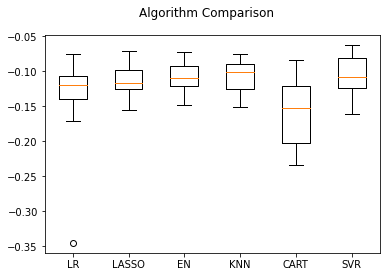

In [ ]:
# Compare Algorithms
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
    Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))) 
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


ScaledLR: -0.141757 (0.072451)
ScaledLASSO: -0.124584 (0.021207)
ScaledEN: -0.124584 (0.021207)
ScaledKNN: -0.092002 (0.022025)
ScaledCART: -0.174696 (0.046700)
ScaledSVR: -0.082697 (0.023474)


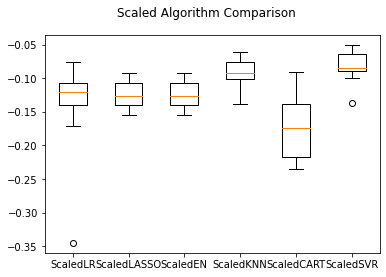

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.087781 using {'n_neighbors': 11}
-0.138590 (0.046504) with: {'n_neighbors': 1}
-0.097758 (0.025714) with: {'n_neighbors': 3}
-0.092769 (0.023091) with: {'n_neighbors': 5}
-0.089752 (0.021608) with: {'n_neighbors': 7}
-0.088310 (0.019028) with: {'n_neighbors': 9}
-0.087781 (0.018477) with: {'n_neighbors': 11}
-0.089593 (0.019317) with: {'n_neighbors': 13}
-0.090038 (0.019042) with: {'n_neighbors': 15}
-0.090693 (0.019051) with: {'n_neighbors': 17}
-0.092175 (0.019005) with: {'n_neighbors': 19}
-0.093967 (0.018987) with: {'n_neighbors': 21}


In [ ]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
    ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle = True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: -0.096747 (0.015619)
ScaledGBM: -0.087225 (0.022987)
ScaledRF: -0.082432 (0.022711)
ScaledET: -0.082424 (0.022179)


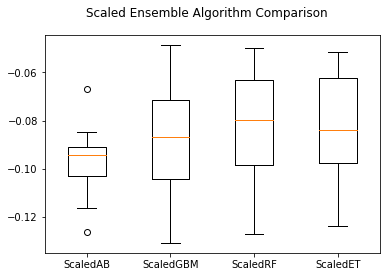

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [ ]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.087380 using {'n_estimators': 150}
-0.087950 (0.021719) with: {'n_estimators': 50}
-0.087703 (0.022801) with: {'n_estimators': 100}
-0.087380 (0.022146) with: {'n_estimators': 150}
-0.087969 (0.022823) with: {'n_estimators': 200}
-0.087755 (0.022692) with: {'n_estimators': 250}
-0.088219 (0.022669) with: {'n_estimators': 300}
-0.088289 (0.022626) with: {'n_estimators': 350}
-0.088669 (0.022692) with: {'n_estimators': 400}


In [ ]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)


GradientBoostingRegressor(n_estimators=400, random_state=7)

In [ ]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

0.106984964061653
